In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [8]:
categorical = list(df.dtypes[df.dtypes=='object'].index)
categorical

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [9]:
categorical.remove('churn')

In [17]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [18]:
df_full_train , df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [19]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

In [20]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical_columns = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [21]:
dv = DictVectorizer()
train_dict = df_train[categorical_columns + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
val_dict = df_val[categorical_columns + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]
churn_prediction = (y_pred>=0.5)
(y_val == churn_prediction).mean()

np.float64(0.8034066713981547)

In [24]:
len(y_val)

1409

In [25]:
(y_val == churn_prediction).sum()

np.int64(1132)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_val, y_pred>=0.5)

0.8034066713981547

In [34]:
thresholds = np.linspace(0,1, 21)
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    scores.append((t,score))

In [35]:
scores

[(np.float64(0.0), 0.2739531582682754),
 (np.float64(0.05), 0.5088715400993612),
 (np.float64(0.1), 0.5911994322214337),
 (np.float64(0.15000000000000002), 0.6664300922640171),
 (np.float64(0.2), 0.7097232079489),
 (np.float64(0.25), 0.7388218594748048),
 (np.float64(0.30000000000000004), 0.7601135557132718),
 (np.float64(0.35000000000000003), 0.7721788502484032),
 (np.float64(0.4), 0.7849538679914834),
 (np.float64(0.45), 0.7934705464868701),
 (np.float64(0.5), 0.8034066713981547),
 (np.float64(0.55), 0.801277501774308),
 (np.float64(0.6000000000000001), 0.7955997161107168),
 (np.float64(0.65), 0.7863733144073811),
 (np.float64(0.7000000000000001), 0.765791341376863),
 (np.float64(0.75), 0.7444996451383961),
 (np.float64(0.8), 0.7338537970191625),
 (np.float64(0.8500000000000001), 0.7260468417317246),
 (np.float64(0.9), 0.7260468417317246),
 (np.float64(0.9500000000000001), 0.7260468417317246),
 (np.float64(1.0), 0.7260468417317246)]

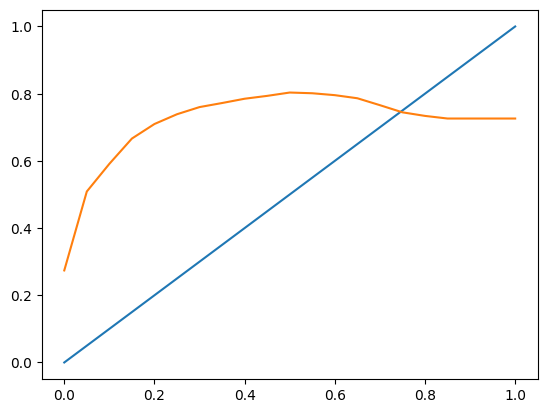

In [36]:
plt.plot(thresholds, scores)

In [37]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [38]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [39]:
actual_pos = (y_val==1)
actual_neg = (y_val == 0)

In [40]:
t = 0.5 
predict_pos = (y_pred>= t)
predict_neg = (y_pred < t)


In [45]:
tp = (predict_pos & actual_pos).sum()
tn = (predict_neg & actual_neg).sum()
fp = (predict_pos & actual_neg).sum()
fn = (predict_neg & actual_pos).sum()

tp,tn,fp,fn

(np.int64(210), np.int64(922), np.int64(101), np.int64(176))

In [46]:
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [49]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [51]:
precision = tp/(tp+fp)
precision

np.float64(0.6752411575562701)

In [54]:
recall = tp/(tp+fn)
recall

np.float64(0.5440414507772021)

In [57]:
tpr = tp/(tp + fn)
tpr, recall

(np.float64(0.5440414507772021), np.float64(0.5440414507772021))

In [56]:
fpr = fp/(fp + tn)
fpr

np.float64(0.09872922776148582)

In [59]:
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_pos = (y_val==1)
    actual_neg = (y_val == 0)
    
    predict_pos = (y_pred>= t)
    predict_neg = (y_pred < t)

    tp = (predict_pos & actual_pos).sum()
    tn = (predict_neg & actual_neg).sum()
    fp = (predict_pos & actual_neg).sum()
    fn = (predict_neg & actual_pos).sum()

    scores.append((tp,tn,fp,fn))

In [63]:
columns = ['tp','tn','fp','fn']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores[::10]

,tp,tn,fp,fn
0,386,0,1023,0
10,366,467,556,20
20,333,667,356,53
30,284,787,236,102
40,249,857,166,137
50,210,922,101,176
60,151,970,53,235
70,76,1003,20,310
80,13,1021,2,373
90,0,1023,0,386


In [64]:
df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)
df_scores[::10]

,tp,tn,fp,fn,tpr,fpr
0,386,0,1023,0,1.000000,1.000000
10,366,467,556,20,0.948187,0.543500
20,333,667,356,53,0.862694,0.347996
30,284,787,236,102,0.735751,0.230694
40,249,857,166,137,0.645078,0.162268
50,210,922,101,176,0.544041,0.098729
60,151,970,53,235,0.391192,0.051808
70,76,1003,20,310,0.196891,0.019550
80,13,1021,2,373,0.033679,0.001955
90,0,1023,0,386,0.000000,0.000000


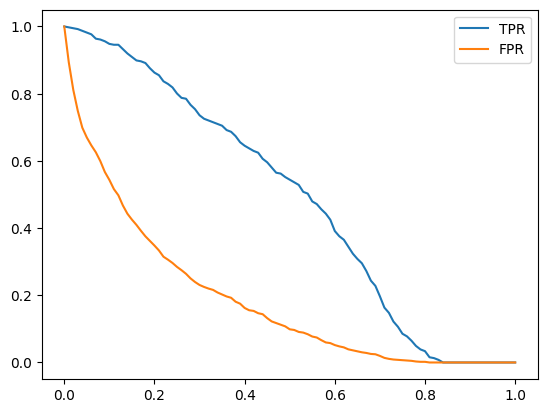

In [67]:
plt.plot(thresholds, df_scores['tpr'], label ='TPR')
plt.plot(thresholds, df_scores['fpr'], label = 'FPR')
plt.legend()

In [68]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(y_val))


In [69]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [70]:
def tpr_fpr_df(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)
    
    for t in thresholds:
        actual_pos = (y_val==1)
        actual_neg = (y_val == 0)
        
        predict_pos = (y_pred>= t)
        predict_neg = (y_pred < t)
    
        tp = (predict_pos & actual_pos).sum()
        tn = (predict_neg & actual_neg).sum()
        fp = (predict_pos & actual_neg).sum()
        fn = (predict_neg & actual_pos).sum()
    
    scores.append((tp,tn,fp,fn))
    
    df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)
    return df_scores

In [73]:
df_rand = tpr_fpr_df(y_val, y_rand)
df_rand[::10]

,tp,tn,fp,fn,tpr,fpr
0,386,0,1023,0,1.000000,1.000000
10,366,467,556,20,0.948187,0.543500
20,333,667,356,53,0.862694,0.347996
30,284,787,236,102,0.735751,0.230694
40,249,857,166,137,0.645078,0.162268
50,210,922,101,176,0.544041,0.098729
60,151,970,53,235,0.391192,0.051808
70,76,1003,20,310,0.196891,0.019550
80,13,1021,2,373,0.033679,0.001955
90,0,1023,0,386,0.000000,0.000000


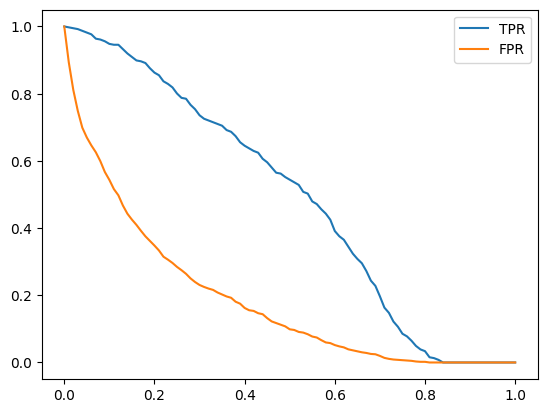

In [74]:
plt.plot(thresholds, df_rand['tpr'], label ='TPR')
plt.plot(thresholds, df_rand['fpr'], label = 'FPR')
plt.legend()